In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt


plt.style.use("seaborn-darkgrid")

## Data loading

We load the original Krakow data in format itx, we resample at different resolutions

In [1]:
from auroraPSI.itx_adapter import ItxAdapter

with open("../data/observations/KRK_input_10min.itx","r") as file:
    itx_adapter = ItxAdapter(file.read())

krakow_df = itx_adapter.to_pandas()
krakow_df.drop([12.0,37.0],axis=1,inplace=True)
krakow_df.columns = [str(column) for column in krakow_df.columns]

krakow_df_10min = krakow_df.resample("10min").mean()
krakow_df_30min = krakow_df.resample("30min").mean()
krakow_df_1h = krakow_df.resample("1H").mean()
krakow_df_1d = krakow_df.resample("1D").mean()
krakow_df_1d

,13.0,15.0,16.0,17.0,18.0,24.0,25.0,26.0,27.0,29.0,...,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0
2018-01-08,0.014055,0.102155,0.027441,0.171507,0.686027,0.006098,0.025926,0.103365,0.201994,0.520907,...,0.020079,0.014993,0.026065,0.013536,0.048168,0.017048,0.024250,0.019464,0.037740,0.019459
2018-01-09,0.018290,0.077865,0.030996,0.193724,0.774897,0.007964,0.021984,0.096851,0.260341,0.499474,...,0.017858,0.011591,0.020738,0.013169,0.039748,0.013702,0.021655,0.014140,0.032570,0.019048
2018-01-10,0.029415,0.279947,0.092737,0.579608,2.318432,0.011006,0.058479,0.260626,0.720267,1.354080,...,0.090894,0.057974,0.096393,0.057941,0.183219,0.066183,0.096322,0.073239,0.129737,0.084260
2018-01-11,0.009301,0.201311,0.075616,0.472597,1.890389,0.011154,0.039086,0.206234,0.452590,0.990080,...,0.046683,0.027975,0.046982,0.028744,0.085180,0.031191,0.048001,0.032962,0.064373,0.040472
2018-01-12,0.017854,0.129223,0.043047,0.269046,1.076182,0.006735,0.025062,0.116785,0.282339,0.577005,...,0.019723,0.011613,0.018278,0.009820,0.037994,0.014143,0.021008,0.015139,0.029757,0.016028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-06,0.076152,0.484725,0.191255,1.195345,4.781380,0.028208,0.082568,0.397512,0.928469,1.923288,...,0.053789,0.030144,0.043214,0.026436,0.079045,0.030372,0.045295,0.033879,0.058939,0.039061
2019-04-07,0.065290,0.293351,0.127214,0.795088,3.180350,0.018417,0.056646,0.251732,0.632129,1.314406,...,0.033619,0.019367,0.031231,0.019297,0.068094,0.022782,0.036376,0.026152,0.045769,0.026249
2019-04-08,0.076184,0.356353,0.168764,1.054777,4.219108,0.026081,0.074363,0.344594,0.831784,1.581721,...,0.047727,0.027227,0.039419,0.023317,0.080577,0.029883,0.043503,0.033296,0.057786,0.035424
2019-04-09,0.077884,0.356973,0.173369,1.083557,4.334230,0.025225,0.071340,0.330305,0.761167,1.410623,...,0.044420,0.024249,0.033413,0.020286,0.056865,0.022898,0.033457,0.023770,0.041836,0.026665


<AxesSubplot:>

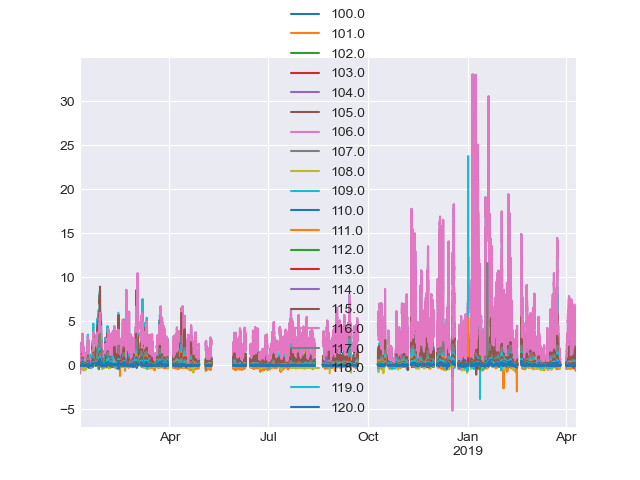

In [18]:
%matplotlib widget

krakow_df_10min.plot()

In [57]:
from ipywidgets import interact, interact_manual
import cufflinks as cf

cf.go_offline()
df = krakow_df_1d.reset_index()
@interact
def scatter_plot(x=list(df.columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), 
             #text='title',
             title=f'{y.title()} vs {x.title()}',

             theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='x', options=('index', '13.0', '15.0', '16.0', '17.0', '18.0', '24.…

In [58]:
df = krakow_df_1d
import ipywidgets as widgets
@interact
def date_plot( y=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys()),
              start_date=widgets.DatePicker(
                description='Start Date',
                disabled=False
                ),
              end_date=widgets.DatePicker(
                description='End Date',
                disabled=False
                )
             ):
    
    df.loc[start_date:end_date].iplot(kind='scatter',  y=y, mode='markers', 
             xTitle="date", yTitle=y.title(), 
             #text='title',
             title=f'{y.title()}',

             theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='y', options=('15.0', '16.0', '17.0', '18.0', '24.0', '25.0', '26.0…

In [59]:

df = krakow_df_1d.reset_index()

@interact
def histogram_plot(x=list(df.select_dtypes('number').columns), 
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    df[str(x)].iplot(kind='histogram', 
             xTitle=x.title(), 
             #text='title',
             title=f'histogram {x.title()}',
             theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='x', options=('13.0', '15.0', '16.0', '17.0', '18.0', '24.0', '25.0…